# Cliff Walking Grid World : Tabular Sarsa v Q-Learning

### resources
https://towardsdatascience.com/reinforcement-learning-cliff-walking-implementation-e40ce98418d4  Ref 1

https://www.youtube.com/watch?v=-UohFVSjekI    Ref 2

Text(0.5, 0, 'Episodes')

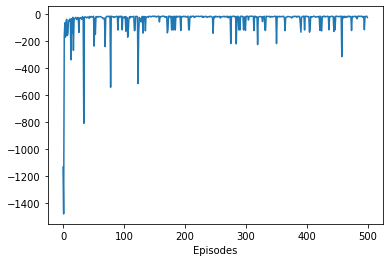

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Define the gridworld environment
WORLD_HEIGHT = 4
WORLD_WIDTH = 12
START_STATE = (0, 0)
GOAL_STATE = (0, 11)
CLIFF_STATES = [(0, i) for i in range(0, 11)]
ACTIONS = ['up', 'down', 'left', 'right']
EPSILON = 0.1
ALPHA = 0.5
GAMMA = 1.0
EPISODES = 500


# Define the Sarsa algorithm (Sutton and Barto’s)
def sarsa(Q):
    state = START_STATE
    # Choose the action to take in the current state, using an epsilon-greedy policy
    if np.random.uniform() < EPSILON:
        # choose a random action
        action = np.random.choice(ACTIONS)
    else:
        # choose action with highest Q values for current state
        values = Q[state[0], state[1], :]
        action = ACTIONS[np.argmax(values)]
    sarsa_reward = 0
    while state != GOAL_STATE:
        # choose next action, watch result  and reward
        next_state, reward = step(state, action)
        if np.random.uniform() < EPSILON:
            next_action = np.random.choice(ACTIONS)
        else:
            values = Q[next_state[0], next_state[1], :]
            next_action = ACTIONS[np.argmax(values)]
        # Update the Q-value for the current SA using the SARSA update rule
        Q[state[0], state[1], ACTIONS.index(action)] += ALPHA * \
            (reward + GAMMA * Q[next_state[0], next_state[1], ACTIONS.index(next_action)] - \
             Q[state[0], state[1], ACTIONS.index(action)])
        # update current state and action
        state = next_state
        action = next_action
        sarsa_reward += reward
        if state == GOAL_STATE:
            break
    return sarsa_reward


# Define the step function
# Ref 1
def step(state, action):
    i, j = state
    if action == 'up':
        next_state = max(i - 1, 0), j
    elif action == 'down':
        next_state = min(i + 1, WORLD_HEIGHT - 1), j
    elif action == 'left':
        next_state = i, max(j - 1, 0)
    elif action == 'right':
        next_state = i, min(j + 1, WORLD_WIDTH - 1)
    if next_state in CLIFF_STATES:
        reward = -100
        next_state = START_STATE
    elif next_state == GOAL_STATE:
        reward = 0
    else:
        reward = -1
    return next_state, reward

# Initialize the Q-table with random values for each state-action pair
sarsa_table = np.random.rand(WORLD_HEIGHT, WORLD_WIDTH, len(ACTIONS))

sarsa_rewards = []
# Run the SARSA algorithm
for episode in range(EPISODES):
    sarsa_reward = sarsa(sarsa_table)
    sarsa_rewards.append(sarsa_reward)

# Plot the results
plt.plot(sarsa_rewards, label='Sarsa')
plt.xlabel('Episodes')


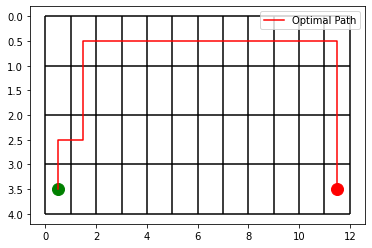

In [ ]:
#get the optimal path based on the Q-table
def get_optimal_path(Q):
    state = START_STATE
    #initialise at start state
    optimal_path = [state]
    while state != GOAL_STATE:
        # Get the Q-values for the current state and all possible actions
        values = Q[state[0], state[1], :]
        # Choose the action with the highest Q-value
        action = ACTIONS[np.argmax(values)]
        # move to the next state with the highest action
        next_state, _ = step(state, action)
        optimal_path.append(next_state)
        state = next_state
    return optimal_path

# Define grid coords
x_coords = np.arange(WORLD_WIDTH+1)
y_coords = np.arange(WORLD_HEIGHT+1)

# Create a grid with vertical and horizontal lines
plt.hlines(y=y_coords, xmin=0, xmax=WORLD_WIDTH, colors='k', linestyles='solid')
plt.vlines(x=x_coords, ymin=0, ymax=WORLD_HEIGHT, colors='k', linestyles='solid')

# Add the start and goal states as green and red circles
plt.plot(START_STATE[1]+0.5, WORLD_HEIGHT-1-START_STATE[0]+0.5, 'go', markersize=12)
plt.plot(GOAL_STATE[1]+0.5, WORLD_HEIGHT-1-GOAL_STATE[0]+0.5, 'ro', markersize=12)

# Plot the optimal path as a red line
optimal_path = get_optimal_path(sarsa_table)
x_vals = [s[1]+0.5 for s in optimal_path]
y_vals = [WORLD_HEIGHT-1-s[0]+0.5 for s in optimal_path]
plt.plot(x_vals, y_vals, 'r', label='Optimal Path')

# flip axis
plt.gca().invert_yaxis()

# Show the plot
plt.legend()
plt.show()



 it seems to be beforming as expected from the example diagram in the book, if you run it multiple times you will get more or less the same result where it always takes a wide route, sometimes completely follwoing the perimeter and other times it might take a step right first then start going up and following the perimeter. I think this is expected as the sarsa algorithm should prioritise exploring the environment more that Q-learning.

Episode 0, Sarsa Avg Reward: -2031.00, Q Avg Reward: -2161.00 Epsilon: 0.100
Episode 50, Sarsa Avg Reward: -109.61, Q Avg Reward: -108.76 Epsilon: 0.095
Episode 100, Sarsa Avg Reward: -62.11, Q Avg Reward: -65.86 Epsilon: 0.090
Episode 150, Sarsa Avg Reward: -42.04, Q Avg Reward: -63.29 Epsilon: 0.086
Episode 200, Sarsa Avg Reward: -29.55, Q Avg Reward: -61.54 Epsilon: 0.082
Episode 250, Sarsa Avg Reward: -29.16, Q Avg Reward: -60.26 Epsilon: 0.078
Episode 300, Sarsa Avg Reward: -30.57, Q Avg Reward: -49.30 Epsilon: 0.074
Episode 350, Sarsa Avg Reward: -28.41, Q Avg Reward: -39.36 Epsilon: 0.070
Episode 400, Sarsa Avg Reward: -24.89, Q Avg Reward: -38.02 Epsilon: 0.067
Episode 450, Sarsa Avg Reward: -24.87, Q Avg Reward: -31.80 Epsilon: 0.064


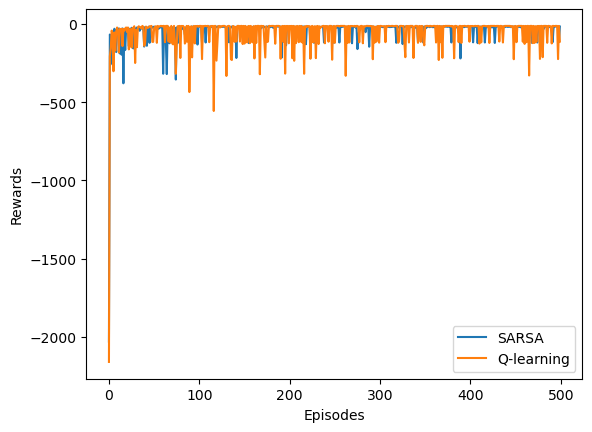

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Define the gridworld environment
WORLD_HEIGHT = 4
WORLD_WIDTH = 12
START_STATE = (0, 0)
GOAL_STATE = (0, 11)
CLIFF_STATES = [(0, i) for i in range(0, 11)]
ACTIONS = ['up', 'down', 'left', 'right']

# Hyperparameters
ALPHA = 0.5
GAMMA = 1.0
EPISODES = 500
EPSILON = 0.1
EPSILON_DECAY = 0.999  # Add a decay rate to epsilon

# Define the Sarsa algorithm
def sarsa(Q, epsilon):
    state = START_STATE
    # Choose the action to take in the current state, using an epsilon-greedy policy
    if np.random.uniform() < epsilon:
        # choose a random action
        action = np.random.choice(ACTIONS)
    else:
        # choose action with highest Q values for current state
        values = Q[state[0], state[1], :]
        action = ACTIONS[np.argmax(values)]
    sarsa_reward = 0
    while state != GOAL_STATE:
        # choose next action, watch result and reward
        next_state, reward = step(state, action)
        if np.random.uniform() < epsilon:
            next_action = np.random.choice(ACTIONS)
        else:
            values = Q[next_state[0], next_state[1], :]
            next_action = ACTIONS[np.argmax(values)]
        # Update the Q-value for the current SA using the SARSA update rule
        Q[state[0], state[1], ACTIONS.index(action)] += ALPHA * \
            (reward + GAMMA * Q[next_state[0], next_state[1], ACTIONS.index(next_action)] - \
             Q[state[0], state[1], ACTIONS.index(action)])
        # update current state and action
        state = next_state
        action = next_action
        sarsa_reward += reward
        if state == GOAL_STATE:
            break
    return sarsa_reward, Q


# Define the Q-learning algorithm
def q_learning(Q, epsilon):
    state = START_STATE
    q_reward = 0
    while state != GOAL_STATE:
        if np.random.uniform() < epsilon:
            action = np.random.choice(ACTIONS)
        else:
            values = Q[state[0], state[1], :]
            action = ACTIONS[np.argmax(values)]
        next_state, reward = step(state, action)
        next_action = ACTIONS[np.argmax(Q[next_state[0], next_state[1], :])]
        Q[state[0], state[1], ACTIONS.index(action)] += ALPHA * \
            (reward + GAMMA * Q[next_state[0], next_state[1], ACTIONS.index(next_action)] - \
             Q[state[0], state[1], ACTIONS.index(action)])
        state = next_state
        q_reward += reward
    return q_reward, Q

# Define the step function
def step(state, action):
    i, j = state
    if action == 'up':
        next_state = max(i - 1, 0), j
    elif action == 'down':
        next_state = min(i + 1, WORLD_HEIGHT - 1), j
    elif action == 'left':
        next_state = i, max(j - 1, 0)
    elif action == 'right':
        next_state = i, min(j + 1, WORLD_WIDTH - 1)
    if next_state in CLIFF_STATES:
        reward = -100
        next_state = START_STATE
    elif next_state == GOAL_STATE:
        reward = 0
    else:
        reward = -1
    return next_state, reward

# Initialize the sarsa with zeros
sarsa_table = np.zeros((WORLD_HEIGHT, WORLD_WIDTH, len(ACTIONS)))
# Initialize the Q-table with zeros
q_table = np.zeros((WORLD_HEIGHT, WORLD_WIDTH, len(ACTIONS)))

sarsa_rewards = []
avg_rewards = []  # Add a list to track the average reward per episode
q_rewards = []
q_avg_rewards = []

for episode in range(EPISODES):
    sarsa_reward, sarsa_table = sarsa(sarsa_table, EPSILON)
    sarsa_rewards.append(sarsa_reward)
    avg_reward = np.mean(sarsa_rewards[-100:])  # Average reward over last 100 episodes
    avg_rewards.append(avg_reward) 
    q_reward, q_table = q_learning(q_table, EPSILON)
    q_rewards.append(q_reward)
    q_avg_reward = np.mean(q_rewards[-100:])  # Average reward over last 100 episodes
    q_avg_rewards.append(q_avg_reward)
    EPSILON *= EPSILON_DECAY  # Decay epsilon
    if episode % 50 == 0:
        print(f"Episode {episode}, Sarsa Avg Reward: {avg_reward:.2f}, Q Avg Reward: {q_avg_reward:.2f} Epsilon: {EPSILON:.3f}")
        
# Plot the results
plt.plot(sarsa_rewards, label='SARSA')
plt.plot(q_rewards, label='Q-learning')
plt.xlabel('Episodes')
plt.ylabel('Rewards')
plt.legend()
plt.show()


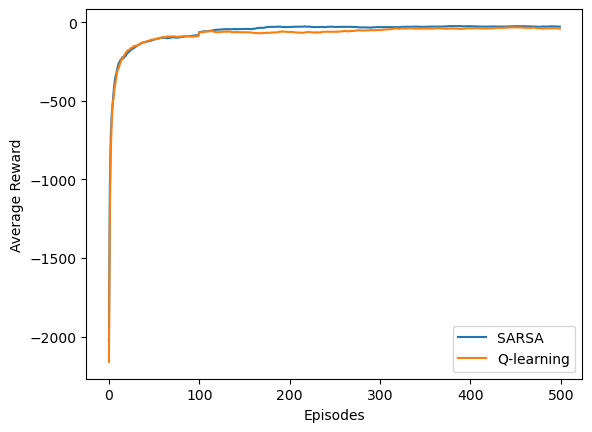

In [ ]:
# Plot the results
plt.plot(avg_rewards, label='SARSA ')
plt.plot(q_avg_rewards, label='Q-learning')
plt.xlabel('Episodes')
plt.ylabel('Average Reward')
plt.legend()
plt.show()


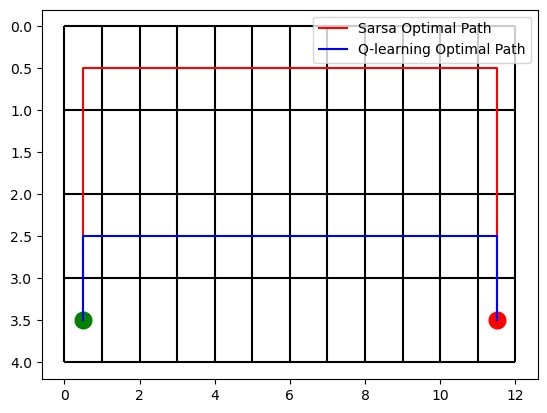

In [ ]:
#get the optimal path based on the Q-table
def get_optimal_path(Q):
    state = START_STATE
    #initialise at start state
    optimal_path = [state]
    while state != GOAL_STATE:
        # Get the Q-values for the current state and all possible actions
        values = Q[state[0], state[1], :]
        # Choose the action with the highest Q-value
        action = ACTIONS[np.argmax(values)]
        # move to the next state with the highest action
        next_state, _ = step(state, action)
        optimal_path.append(next_state)
        state = next_state
    return optimal_path

# Define grid coords
x_coords = np.arange(WORLD_WIDTH+1)
y_coords = np.arange(WORLD_HEIGHT+1)

# Create a grid with vertical and horizontal lines
plt.hlines(y=y_coords, xmin=0, xmax=WORLD_WIDTH, colors='k', linestyles='solid')
plt.vlines(x=x_coords, ymin=0, ymax=WORLD_HEIGHT, colors='k', linestyles='solid')

# Add the start and goal states as green and red circles
plt.plot(START_STATE[1]+0.5, WORLD_HEIGHT-1-START_STATE[0]+0.5, 'go', markersize=12)
plt.plot(GOAL_STATE[1]+0.5, WORLD_HEIGHT-1-GOAL_STATE[0]+0.5, 'ro', markersize=12)

# Plot the Sarsa optimal path as a red line
optimal_path = get_optimal_path(sarsa_table)
x_vals = [s[1]+0.5 for s in optimal_path]
y_vals = [WORLD_HEIGHT-1-s[0]+0.5 for s in optimal_path]
plt.plot(x_vals, y_vals, 'r', label='Sarsa Optimal Path')

optimal_path = get_optimal_path(q_table)
x_vals = [s[1]+0.5 for s in optimal_path]
y_vals = [WORLD_HEIGHT-1-s[0]+0.5 for s in optimal_path]
plt.plot(x_vals, y_vals, 'b', label='Q-learning Optimal Path')

# flip axis
plt.gca().invert_yaxis()

# Show the plot
plt.legend()
plt.show()

